<a href="https://colab.research.google.com/github/TAUforPython/nonlinear_phasepicture/blob/main/%D0%B2%D1%8B%D0%BD%D1%83%D0%B6%D0%B4%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B2%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B5%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D1%85_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# загружаем библиотеки
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
#определяем статическую характеристику нелинейного элемента
def rele(xNL,dxNL,C,b,m):
  if xNL > 0:
    yNL = C
  else:
    yNL = -C
  return yNL

In [48]:
#задаем систему дифференциальных уравнений в форме Коши и вынужденное движение!
def ode(y, t, b, c):
        theta, omega = y
        dydt = [omega, -b * omega - c * theta  +  1*rele(theta, omega, 1, 0, 0) + np.sin(0.2*2*np.pi*t)]
        return dydt

In [49]:
#задаем функцию численного решения дифференциального уравнения
def calcODE(args, y0, dy0, ts, nt):
    y0 = [y0, dy0]
    t = np.linspace(0, ts, nt)
    sol = odeint(ode, y0, t, args)
    return sol

In [50]:
#задаем функцию отрисовки фазового портрета в зависимости от начальных условий
def drawPhasePortrait(args, deltaX, deltaDX, startX, stopX, startDX, stopDX, ts, nt):

    plt.figure(figsize=(10,10))
    for y0 in range(startX, stopX, deltaX):
            for dy0 in range(startDX, stopDX, deltaDX):
                sol = calcODE(args, y0, dy0, ts, nt)
                plt.plot(sol[:, 0], sol[:, 1], 'b')
    plt.xlabel('x = $x_1$')
    plt.ylabel('dx/dt = $x_2$')
    plt.grid()
    plt.show()

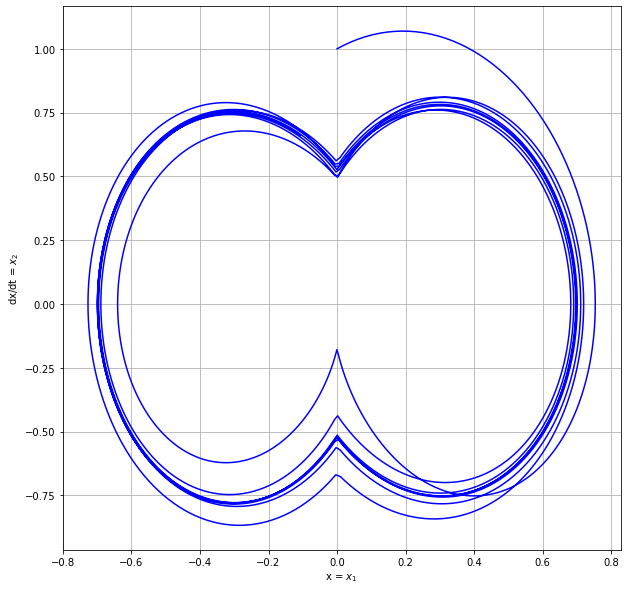

In [51]:
#задаем параметры системы и начальные условия
b = 0.25
c = 5.0
args=(b, c)

drawPhasePortrait(args, 1, 1, 0, 1, 1, 2, ts = 40, nt = 2000)

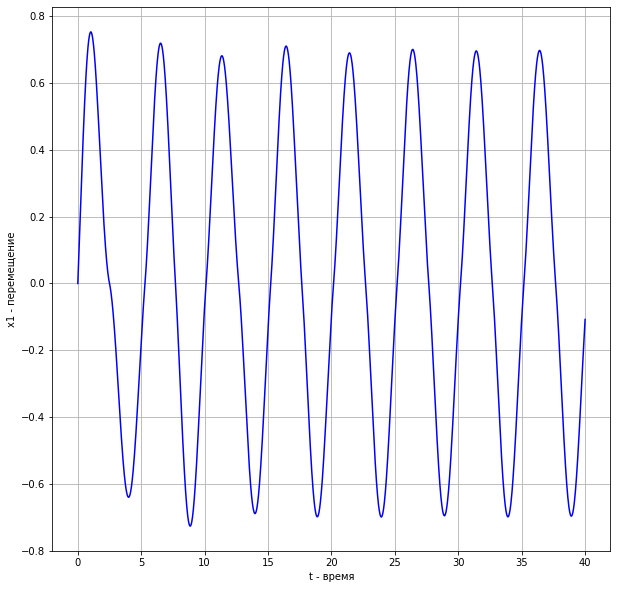

In [52]:
sol = calcODE(args, y0 = 0, dy0 = 1, ts = 40, nt = 2000)
t = np.linspace(0, 40, 2000)
plt.figure(figsize=(10,10))
plt.xlabel('t - время')
plt.ylabel('x1 - перемещение')
plt.plot(t, sol[:, 0], 'b')
plt.grid()
plt.show()

# New Section

In [53]:
np.savetxt("buffervar.csv", sol, delimiter=",")